# Workshop Hands On KI
# Klassifikation
**In dieser Aufgabe implementieren wir ein simples neuronales Netzwerk zur Klassifikation eines Bauteils. Der folgende Code ist ein vollständiges Beispiel für ein binäres Klassifikationsproblem mit neuronalen Netzen, von der Datenvorbereitung bis zur Modellbewertung.**

**Bibliotheken importieren:** Der folgende Code importiert die erforderlichen Bibliotheken für das Erstellen, Trainieren und Evaluieren eines KI-Modells sowie zugehöriger graphischer Ausgaben.

Wichtige Bibliotheken sind beispielsweise

1. pandas:
   - Eine Bibliothek für Datenmanipulation und -analyse. Mit ihr kann man Datenstrukturen wie DataFrames erstellen und bearbeiten, was besonders nützlich für das Handling großer Datenmengen ist.

2. seaborn und matplotlib:
   - Beides sind Visualisierungsbibliotheken. Seaborn baut auf Matplotlib auf und ermöglicht die Erstellung schön gestalteter Grafiken. Beide werden oft verwendet, um Daten zu explorieren und die Ergebnisse der Datenanalyse visuell darzustellen.

3. sklearn (scikit-learn):

   - Eine Bibliothek für maschinelles Lernen. Beispielsweise wird `train_test_split` genutzt, um Daten in Trainings- und Testsets aufzuteilen. Die `confusion_matrix` hilft bei der Bewertung der Leistung eines Klassifizierungsmodells, indem sie zeigt, wie oft Vorhersagen in jeder Klasse korrekt oder falsch waren.

4. tensorflow und tensorflow.keras:
   - TensorFlow ist eine Open-Source-Plattform für maschinelles Lernen. Keras ist eine Schnittstelle für TensorFlow, die das Erstellen und Trainieren von Modellen vereinfacht. `Sequential` ermöglicht die einfache Erstellung eines linearen Stapels von Schichten für ein neuronales Netzwerk. `Dense` steht für vollständig verbundene Neuronenschichten.

In [ ]:
# Profiling
!pip install ydata_profiling > /dev/null 2>&1
from ydata_profiling import ProfileReport

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

Datensatz:
- TrendAuto2030plus_Entwicklungssystematik_HandsOnKI_Klassifikation_DATEN.xlsx

In diesem Datensatz sind Bauteile anhand von Merkmalen (Zuliefererqualität, Produktivität der Mitarbeiter, Produktionskosten, -volumen, ...) sowie ihrer Klassifizierung "nicht defekt" (0) oder "defekt" (1) beschrieben. Das Ziel ist dabei, die Klasse der Bauteile durch ein KI-Modell korrekt vorherzusagen.

In [ ]:
# Pfad der Daten in Excel-Datei definieren
data_path = 'https://drive.google.com/uc?export=download&id=1833x8f5XlNCQ2nLGZiaptBD8Ew18s-8d'

### Datenakquise

**Daten laden und vorbereiten:** Der folgende Code lädt zunächst die Daten mithilfe der Bibliothek pandas. Mit `pd.read_excel(data_path)` werden beispielsweise Daten aus einer Excel-Datei geladen und mit `data.head()` werden die ersten Zeilen der Daten angezeigt, um einen Überblick zu bekommen. Mit `data.info()` erhält man zudem eine kompakte Übersicht über die Struktur der Daten, einschließlich Spaltenanzahl, Datentypen und Speicherverbrauch, während `data.describe().T` statistische Kennzahlen der Daten liefert.

### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.


**Aufgabe:**

**1. Lesen Sie die Daten der spezifizierten Excel-Datei ein.**

**2. Analysieren Sie die Daten mithilfe der Befehle "data.info()" & "data.describe().T"**

Sie kommen nicht weiter? Lassen Sie sich durch Vibe Coding helfen:
https://cloud.google.com/discover/what-is-vibe-coding?hl=de


In [ ]:
# Daten einlesen
data = pd.read_excel(XXX)

# Daten ausgeben
print("Kopf der Datei:")
print(data.head())
print("\n")
print("Anzahl Zeilen & Spalten:")
print(data.shape)
print("\n")

# Daten rudimentär analysieren
print("Infos über die Datei:")
print(XXX)
print("\n")
print("Statistische Daten:")
print(XXX)

### Datenanalyse

**Explorative Datenanalyse (EDA):** Der folgende Code analysiert beispielhaft mithilfe des Profile Reports die Verteilung der Merkmale des Datensatzes, um Muster und Beziehungen zu erkennen. Der Profile Report enthält u.a.
 - Eigenschaften der einzelnen Variablen,
 - Interaktionsgrafik,
 - visualisiert Datendichte zwischen zwei Variablen,
 - Korrelationsgrafik,
 - lineare Zusammenhänge zwischen Variablen,
 - schnelle Überprüfung fehlender Werte pro Variable.

**Aufgabe:**

**Analysieren Sie die Ergebnisse des Profile Reports. Was fällt Ihnen auf?**

In [ ]:
# Daten detailliert analysieren und Analyseergebnisse visualisieren
profile_report = ProfileReport(data, title = "Datenanalyse", explorative = True)
profile_report.to_notebook_iframe()

### Datenvorbereitung

Der Profile Report zeigt, dass die Ausgangsvariable ungleich verteilt ist, mit 517 Einträgen für "nicht defekt" (0) und 2723 Einträgen für "defekt" (1). Diese Unausgewogenheit beeinträchtigt die Fähigkeit eines KI-Modells, sinnvoll zu klassifizieren, da es dazu neigt, vorwiegend "defekt" zu prognostizieren. Um dies zu umgehen, wird die Anzahl der "defekt"-Einträge auf zufällig ausgewählte 517 begrenzt.

In [ ]:
# Datensatz entsprechend Ausgangsvariable aufteilen
data_majority = data[data['DefectStatus [1]'] == 1]
data_minority = data[data['DefectStatus [1]'] == 0]

# Datensatz reduzieren und kombinieren
data_balanced = pd.concat([data_majority.sample(n = data_minority.shape[0], random_state = None), data_minority])

# Datensatz mischen
data_balanced = data_balanced.sample(frac = 1, random_state = 42).reset_index(drop = True)

**Aufteilung in Eingangs- und Ausgangsvariablen:** Der folgende Code definiert die Eingangs- (`X`) und Ausgangsvariablen (`y`). Dabei enthält `X` alle Spalten außer `DefectStatus [1]`. `y` wird aus der Spalte `DefectStatus [1]` erzeugt, wobei der Wert 1 für "defekt" sowie der Wert 0 für "nicht defekt" steht.

### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.

**Aufgabe:**

**Definieren Sie die Ausgangsvariable.**

In [ ]:
# Eingangsvariablen definieren
X = data_balanced[['ProductionVolume [1/day]', 'ProductionCost [$]', 'SupplierQuality [%]', 'DeliveryDelay [days]', 'DefectRate [1]', 'QualityScore [%]',
        'MaintenanceHours [hours]', 'DowntimePercentage [%]', 'InventoryTurnover [1]', 'StockoutRate [%]', 'WorkerProductivity [%]', 'SafetyIncidents [1]',
        'EnergyConsumption [kWh]', 'EnergyEfficiency [1]', 'AdditiveProcessTime [hours]', 'AdditiveMaterialCost [$]']]
        # doppelt eckige Klammern, da mehrere Variablen

# Ausgangsvariablen definieren
y = data_balanced[XXX]

**Standardisierung numerischer Werte:** Der folgende Code standardisiert numerische Werte mithilfe des Standardscalers, sodass der Mittelwert der Daten 0 und die Standardabweichung 1 beträgt, sodass alle Werte in einer vergleichbaren Größenordnung vorliegen. Diese Standardisierung ist notwendig für KI-Modelle, die empfindlich auf Skalen oder Distanzen reagieren, wie logistische Regression, k-Means und neuronale Netze, jedoch nicht erforderlich für skalenunabhängige KI-Modelle wie Random Forest und XGBoost.

### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.

**Aufgabe:**

**Skalieren Sie die Eingangsvariablen.**

In [ ]:
# Eingangsvariablen skalieren
scaler = StandardScaler()
X_scaled = scaler.fit_transform(XXX)

**Aufteilung in Trainings- und Testdaten:** Der folgende Code teilt den Datensatz in Trainings- (z.B. 80%) und Testdaten (z.B. 20%) mittels der Funktion `train_test_split` auf.

### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.

**Aufgabe:**

**Teilen Sie den Datensatz in 80 % Trainings- sowie 20 % Testdaten auf.**

In [ ]:
# Daten in Test- und Trainingsdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = XXX, random_state = 42)

### Modellauswahl und Training

### Neuronales Netz

**Modell definieren und zusammenstellen:** Der folgende Code erstellst mittels der Funktion `Sequential` ein sequenzielles Modell eines neuronalen Netzes. Dies ist ein Stapel von Schichten, wo jede Schicht genau eine Eingabe und eine Ausgabe hat. Mit der Funktion `Dense` werden anschließend dem Modell Schichten hinzugefügt. Eine Schicht des neuronalen Netzes benötigt dabei Spezifikationen wie die Anzahl der Neuronen und die Aktivierungsfunktion. Das hier initial definierte Modell hat drei Schichten: eine erste Schicht, die sogenannte Eingabeschicht mit 16 Neuronen (Aufgrund 16 Eingangsvariablen) und ReLU-Aktivierung, eine zweite versteckte Schicht mit 32 Neuronen und ReLU-Aktivierung sowie eine dritte Schicht die sogenannte Ausgabeschicht, mit einem Neuron (aufgrund einer Ausgangsvariablen) und Sigmoid-Aktivierung für die hier vorliegende binäre Klassifikationsaufgabe, um einen Rückgabewert zwischen 0 und 1 sicherzustellen. Außerdem wird hier eine Verlustfunktion (`loss = 'binary_crossentropy'`), ein Optimierer (`optimizer = 'adam'`) und eine Metrik (`metrics = 'accuracy'`) angegeben, mit dem das Modell mittels der Funktion `model.compile` kompiliert wird.

*Die Anzahl Schichten, Neuronen pro Schicht sowie die Aktivierungsfunktion pro Schicht sind klassische Designparameter der Architektur eines neuronalen Netzwerks, welche zum Finetuning des Modells variiert werden können.*

### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.

**Aufgabe:**

**Definieren Sie die Aktivierungsfunktion der Ausgabeschicht.**

Zur Auswahl:
- ReLu
- Sigmoid

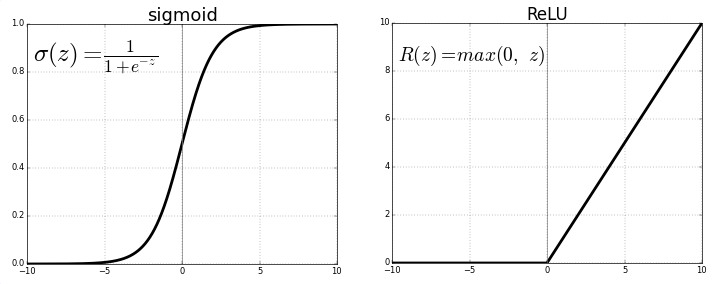

In [ ]:
# Neuronales Netz erstellen
model_nn = Sequential()
model_nn.add(Input(shape = (X_train.shape[1], )))
model_nn.add(Dense(16, activation = 'relu'))
model_nn.add(Dense(32, activation = 'relu'))
model_nn.add(Dense(1, activation = XXX))

# Modell kompilieren
model_nn.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

**Modell trainieren:** Der folgende Code trainiert das Modell des neuronalen Netzes mit den Trainingsdaten, z.B. über 50 Epochen (`epochs`) mit einer Batch-Größe von z.B. 8 (`batch_size`) mittels der Funktion `model.fit`, wobei 20 % der Daten für die Validierung reserviert werden (`validation_split`).

*Die Anzahl Epochen sowie die Batch-Größe sind klassische Designparameter beim Training eines neuronalen Netzwerks, welche zum Finetuning des Modells variiert werden können.*

### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.

**Aufgabe:**

**1. Definieren Sie eine optimale Epochen-Anzahl für das Training.**

**2. Definieren Sie eine optimale Batch-Size für das Training.**

In [ ]:
# Modell trainieren
history = model_nn.fit(X_train, y_train, epochs = XXX, batch_size = XXX, validation_split = 0.2)

### Modellanalyse

**Modell evaluieren:** Der folgende Code erlaubt die Bewertung des trainierten Modells, indem die Trainings- und Validierungsgenauigkeit sowie der Verlust über die Epochen hinweg in Diagrammen dargestellt werden. Hiermit kann analysiert werden, wie gut das Modell lernt und generalisiert. Dabei ist es wichtig, frühzeitig bestimmte Zustände zu erkennen:
- Overfitting tritt auf, wenn der Trainingsverlust sinkt, während der Validierungsverlust steigt, was darauf hindeutet, dass das Modell die Trainingsdaten „auswendig“ lernt.
- Underfitting hingegen zeigt sich, wenn beide Verlustkurven hoch bleiben, was bedeutet, dass das Modell zu wenig lernt.

Durch die Visualisierung des Trainingsprozesses kann eine fundierte Beurteilung getroffen werden, ob Anpassungen der Trainingsparameter erforderlich sind, beispielsweise durch Anpassung der Epochenanzahl oder Änderung der Netzwerkgröße.

### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.

**Aufgabe:**

**Beschriften Sie passend die x-Achse.**

In [ ]:
# Genauigkeit des Modells visualisieren
plt.figure(figsize = (5, 3))
plt.plot(history.history['accuracy'], label = 'Trainingsgenauigkeit')
plt.plot(history.history['val_accuracy'], label = 'Validierungsgenauigkeit')
plt.title('Trainings- und Validierungsgenauigkeit')
plt.xlabel(XXX)
plt.ylabel('Genauigkeit')
plt.legend()
plt.show()

# Verlust des Modells visualisieren
plt.figure(figsize = (5, 3))
plt.plot(history.history['loss'], label = 'Trainingsverlust')
plt.plot(history.history['val_loss'], label = 'Validierungsverlust')
plt.title('Trainings- und Validierungsverlust')
plt.xlabel(XXX)
plt.ylabel('Verlust')
plt.legend()
plt.show()

Der folgende Code bewertet detaillierter das trainierte Modell. Dazu werden die Testdaten (`X_test` und `y_test`) verwendet, um gängige Metriken, wie die Genauigkeit (`accuracy`) zu berechnen. Die Vorhersagen des Modells für den Testdatensatz werden ebenfalls berechnet (`y_pred`) und in eine binäre Klasse umgewandelt (größer als 0.5 wird zu 1, sonst zu 0). Anschließend werden die Vorhersagen mit den tatsächlichen Werten verglichen und ein Klassifikationsbericht erstellt (`print(classification_report(y_test, y_pred))`). Der Klassifikationsbericht zeigt wichtige Metriken zur Bewertung der Leistung des Modells wie Genauigkeit, Wiederholungsrate, F1-Score usw.

### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.

**Aufgabe:**

**Evaluieren Sie das trainierte Modell mit den Testdaten.**

In [ ]:
# Modell evaluieren
loss, accuracy = model_nn.evaluate(XXX, XXX)

# Vorhersagen treffen
y_pred = (model_nn.predict(X_test) > 0.5).astype(int)

# Klassifikationsbericht erstellen
print("Classification Report:")
print(classification_report(y_test, y_pred))

Der folgende Code erstellt die Konfusionsmatrix für das entwickelte Modell. Eine Konfusionsmatrix ist ein nützliches Hilfsmittel, um die Leistung eines Klassifikationsmodells zu bewerten, indem sie die tatsächlichen gegen die vorhergesagten Werte aufstellt:
- True Positives (TP): korrekt als positiv klassifiziert
- True Negatives (TN): korrekt als negativ klassifiziert
- False Positives (FP): fälschlich als positiv erkannt
- False Negatives (FN): fälschlich als negativ erkannt

In [ ]:
# Konfusionsmatrix berechnen
cm_nn = confusion_matrix(y_test, y_pred)

# Konfusionsmatrix anzeigen
plt.figure(figsize = (7, 5))
sns.heatmap(cm_nn, annot = True, cmap = 'Blues', xticklabels = ['Kein Defekt', 'Defekt'], yticklabels = ['Kein Defekt', 'Defekt'])
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.title('Konfusionsmatrix')
plt.show()

**Feinabstimmung und Vorhersagen:** Basierend auf der vorherigen Auswertung ist ersichtlich, dass das Modell des neuronalen Netzwerks noch kein optimales Verhalten für diese binäre Klassifierungsaufgabe zeigt. Daher kann in einem nächsten Schritt das Modell weiter angepasst werden, um die Leistung zu verbessern. Ist ein optimales Modell des neuronalen Netzwerks gefunden, kann das Modell realisiert werden, um beispielsweise wie in dieser Anwendung Vorhersagen zu tätigen.

### Random Forest Classifier

Der folgende Code erstellt, trainiert und analysiert ein optimiertes neuronales Netzwerk, den Random Forest Classifier, für denselben Datensatz und dieselbe binäre Klassifizierungsaufgabe. Die einzelnen Schritte und Programmierungen sind dabei identisch bzw. ähnlich zu zuvor. Der Random-Forest-Classifier ist ein leistungsfähiger, vielseitig einsetzbarer maschineller Lernalgorithmus, der zum Klassifizieren komplexer Datensätze verwendet wird. Er gehört zur Gruppe der Ensemble-Lernmethoden, was bedeutet, dass er durch das Zusammenführen von Vorhersagen mehrerer Modelle (in diesem Fall Entscheidungsbäume) funktioniert. Die "Random Forest"-Methode verbessert die Modellleistung und verhindert das Overfitting (Überanpassung), welches oft bei einzelnen Entscheidungsbäumen auftritt.

*Die Anzahl an Entscheidungsbäumen ist ein  Designparameter des Random Forest Classifiers, welcher zum Finetuning des Modells variiert werden kann.*


### 🔧 Bitte diesen Code bearbeiten
Passen Sie die Stellen XXX an.

**Aufgabe:**

**1. Definieren Sie die Anzahl der Entscheidungsbäume.**

**2. Implementieren Sie die Funktion, mit der das Modell trainiert wird.**

In [ ]:
# Modell definieren
model_rf = RandomForestClassifier(n_estimators = XXX, random_state = 42)

# Modell trainieren
model_rf.fit(XXX, XXX)

In [ ]:
# Vorhersagen und Bewertung
y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# Konfusionsmatrix erstellen
cm_rf = confusion_matrix(y_test, y_pred)

# Konfusionsmatrix anzeigen
plt.figure(figsize = (7, 5))
sns.heatmap(cm_rf, annot = True, cmap = 'Blues', xticklabels = ['nicht defekt', 'defekt'], yticklabels = ['nicht defekt', 'defekt'])
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.title('Konfusionsmatrix')
plt.show()

**Aufgabe:**

**Analysieren Sie die Ergebnisse des Random Forest Classifiers. Was fällt Ihnen auf?**

In [ ]:
# Wichtigkeit der einzelnen Eingangsgrößen des Modells laden
feature_importances = model_rf.feature_importances_

# Namen der Eingangsgrößen und Ausgabeklassen angeben
feature_names = ['ProductionVolume [1/day]', 'ProductionCost [$]', 'SupplierQuality [%]', 'DeliveryDelay [days]', 'DefectRate [1]', 'QualityScore [%]',
        'MaintenanceHours [hours]', 'DowntimePercentage [%]', 'InventoryTurnover [1]', 'StockoutRate [%]', 'WorkerProductivity [%]', 'SafetyIncidents [1]',
        'EnergyConsumption [kWh]', 'EnergyEfficiency [1]', 'AdditiveProcessTime [hours]', 'AdditiveMaterialCost [$]']
target_names = ['nicht defekt', 'defekt']

# Wichtigkeit der einzelnen Eingangsrößen des Modells visualisieren
print(f"Wichtigkeit:")
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {round(importance * 100, 2)} %")

In [ ]:
# Jeden Baum im Random Forest visualisieren
for i, est in enumerate(model_rf.estimators_):
    plt.figure(figsize = (10, 5))
    tree.plot_tree(est, filled = True, feature_names = feature_names, class_names = target_names)
    plt.title(f'Random Forest Baum {i}')

**Aufgabe:**

**1. Optimieren Sie die verschiedenen KI-Modelle.**

**2. Welches Modell liefert die besten Ergebnisse?**

### Vergleich

**Modellvergleich:** Der folgende Code vergleicht die verschiedener Modelle  Neuronale Netz (NN) und Random Forest (RF). Hierbei wird die jeweilige Konfusionsmatrix verwendet, um die Modellgüte zu veranschaulichen.

In [ ]:
# Alle Konfusionsmatrizen nebeneinander anzeigen
fig, axes = plt.subplots(1, 2, figsize = (18, 5))
conf_matrices = {
    "Neuronales Netz": cm_nn,
    "Random Forest": cm_rf,
}
for ax, (title, matrix) in zip(axes, conf_matrices.items()):
    sns.heatmap(matrix, annot = True, fmt = 'd', cmap = 'Blues',
                xticklabels = ['nicht defekt', 'defekt'],
                yticklabels = ['nicht defekt', 'defekt'],
                ax = ax, cbar = False)
    ax.set_title(title)
    ax.set_xlabel("Vorhersgesagte Klasse")
    ax.set_ylabel("Tatsächliche Klasse")
plt.suptitle("Konfusionsmatrizen im Vergleich", fontsize = 16)
plt.tight_layout()
plt.show()